In [ ]:
! pip install pandas

In [3]:
import pandas as pd

In [4]:
url='https://raw.githubusercontent.com/romulosilvestre/semanaclassificacao/refs/heads/master/dataset/anacondabank_credit_scoring.csv'

df = pd.read_csv(url)

df_transformado=df.copy()

df_transformado['conta_corrente'].unique()

# etapa 2 - Dicionario
dict_cc={
    '< 0 DM':1,

    '0 <= ... < 200 DM':2,
    'no checking account':3,
    '>= 200 DM / salary assignments for at least 1 year':4
}
# etapa - Mapear
# dataset['coluna'] = dataset['coluna'].map(dicionario)

df_transformado['conta_corrente'] = df_transformado['conta_corrente'].map(dict_cc)

(df_transformado['historico_credito'].unique())
dict_hc={
    'critical account/ other credits existing (not at this bank)':1,
    'existing credits paid back duly till now':2,
    'delay in paying off in the past':3,
    'no credits taken/ all credits paid back duly':4,
    'all credits at this bank paid back duly':5
}
df_transformado['historico_credito'] = df_transformado['historico_credito'].map(dict_hc)

dict_pe={
    'domestic appliances':1,
    '(vacation - does not exist?)':2,
    'radio/television':3,
    'car (new)':4,
    'car (used)':5,
    'business':6,
    'repairs':7,
    'education':8,
    'furniture/equipment':9,
    'retraining':10


}
df_transformado['proposito_emprestimo'] = df_transformado['proposito_emprestimo'].map(dict_pe)

dict_rc={
    'unknown/ no savings account':1,
    '... < 100 DM':2,
    '500 <= ... < 1000 DM ':3,
    '.. >= 1000 DM ':4,
    '100 <= ... < 500 DM':5
}
df_transformado['reserva_cc'] = df_transformado['reserva_cc'].map(dict_rc)

df_transformado['outros_fiadores'].unique()


# Dictionary

dict_ofiador_cc = {
    'none': 0,
    'guarantor': 1,
    'co-applicant': 2

}

df_transformado['outros_fiadores'] = df_transformado['outros_fiadores'].map(dict_ofiador_cc)

df_transformado['outros_planos_financiamento'].unique()

dict_opf = {
    'none': 1,
    'bank': 2,
    'stores': 3,
    
}
df_transformado['outros_planos_financiamento'] = df_transformado['outros_planos_financiamento'].map(dict_opf)

df_transformado['propriedade'].unique()
dict_cc_prop = {
    'real estate': 1,
    'if not A121 : building society savings agreement/ life insurance': 2,
    'unknown / no property': 3,
    'if not A121/A122 : car or other, not in attribute 6': 4
}


df_transformado['propriedade'] = df_transformado['propriedade'].map(dict_cc_prop)

df_transformado['telefone'].unique()

dict_telefone = {
    'yes, registered under the customers name ':1,
    'none':0,
}

df_transformado['telefone'] = df_transformado['telefone'].map(dict_telefone)


df_transformado['trabalhador_estrangeiro'].unique()


dict_trabalhador_estrangeiro = {
    'yes':1,
    'no':0,
}

df_transformado['trabalhador_estrangeiro'] = df_transformado['trabalhador_estrangeiro'].map(dict_trabalhador_estrangeiro)

df_transformado['tipo_residencia'].unique()


dict_res = {
    'own':1,
    'for free':2,
    'rent':3,
}

df_transformado['tipo_residencia'] = df_transformado['tipo_residencia'].map(dict_res)

df_transformado['status_emprego'].unique()

dict_status = {
    'skilled employee / official':1,
    'unskilled - resident':2,
    'management/ self-employed/ highly qualified employee/ officer':3,
    'unemployed/ unskilled - non-resident':4
}


df_transformado['status_emprego'] = df_transformado['status_emprego'].map(dict_status)

df_transformado['tempo_emprego_atual'].unique()
dict_cc={
        '.. >= 7 years':1,
        '1 <= ... < 4 years':2,
        '4 <= ... < 7 years':3,
        'unemployed':4,
        '... < 1 year ':5

    }
df_transformado['tempo_emprego_atual'] = df_transformado['tempo_emprego_atual'].map(dict_cc)


df_transformado['sexo_est_civil'].unique()
dict_cc={
    'male : single':1,
    'female : divorced/separated/married':2,
    'male : divorced/separated':3,
    'male : married/widowed':4
}
df_transformado['sexo_est_civil'] = df_transformado['sexo_est_civil'].map(dict_cc)
df_transformado.info()

# link do mapa do mental

# https://www.mindmeister.com/3486258299/intelig-ncia-artificial

# recurso de ajuda para ver tipo object
# df_object = df.select_dtypes(include=['object'])
# df_object.head()	

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   default                      1000 non-null   int64
 1   conta_corrente               1000 non-null   int64
 2   prazo_emprestimo_meses       1000 non-null   int64
 3   historico_credito            1000 non-null   int64
 4   proposito_emprestimo         1000 non-null   int64
 5   valor_emprestimo             1000 non-null   int64
 6   reserva_cc                   1000 non-null   int64
 7   tempo_emprego_atual          1000 non-null   int64
 8   taxa_comp_salario            1000 non-null   int64
 9   sexo_est_civil               1000 non-null   int64
 10  outros_fiadores              1000 non-null   int64
 11  anos_residencia_atual        1000 non-null   int64
 12  propriedade                  1000 non-null   int64
 13  idade                        1000 non-null   int6

# Regressão Logística

In [5]:
! pip install scikit-learn

# Criando um modelo preditivo

In [6]:
# Defiir o nosso x (dados)
X = df_transformado.drop(columns='default')

In [7]:
# Definir o nosso y (rotulos/classes/target/variavel alvo/ varaivel cateforica)
# variavel para prever o futuro
y = df_transformado['default']

In [17]:
# usar o método trein_test_split para separar treino e teste
# importar o train_test_split
from sklearn.model_selection import train_test_split
#definir uma constante semente
SEED = 77
#definir  variáveis 
#chamar o metodo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = SEED)

In [18]:
# importar
from sklearn.linear_model import LinearRegression

In [19]:
# criar um objeto da classe LogisticRegression

from sklearn.linear_model import LogisticRegression

# Criar um objeto da classe LogisticRegression
modelo = LogisticRegression(max_iter=1000)

In [20]:
modelo.fit(X_train, y_train)

c:\Users\ead\Documents\Rafael\InteligenciaArtificial\anacondabank_m\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

# Metricas

In [21]:
# 1 - Acurácia de treino
print(f"acuracia de treino: {modelo.score(X_train, y_train):.2f}")

acuracia: 0.77


In [22]:
# 2 Acuracia de testes

# Modelo traz as previsões
previsoes= modelo.predict(X_test) 
#importar metricas do sklearn
from sklearn.metrics import accuracy_score
# Definindo a acuracia
acuracia = accuracy_score(y_test, previsoes)
# Mostrar variavel
print(f"a acuracia de teste foi: {acuracia * 100:.2f} %")

a acuracia de teste foi: 76.33 %


# Matriz de confusão

In [24]:
# instalar matplotlib   
! pip install matplotlib

  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.54.1-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl (55 kB)
Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


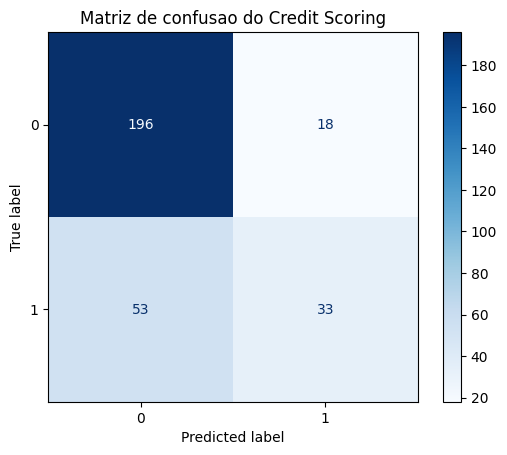

In [25]:
import matplotlib.pyplot as plt
# importar ConfusionMAtrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Fazendo a previsao com modelo treinado
y_pred = modelo.predict(X_test)

# Criar a matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap='Blues')

#Adicoinar um título
plt.title('Matriz de confusao do Credit Scoring')

# Mostrar
plt.show()